# Assignment 2:

### Test if the distribution of ages is the same for 

* 1) male and female riders

* 2) day and night riders

### Use 3 tests:
* KS
* Pearson's
* Spearman's. 

For the KS do the test with the entire dataset and with a subset 200 times smaller

Choose a significant threshold for the whole exercise. 

For each test phrase the Null Hypothesis in words.

Describe the return of the scipy function you use in each case.

State the result in terms of rejection of the Null.

In [1]:
import pandas as pd
import numpy as np
import os
from getCitiBikeCSV import getCitiBikeCSV
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline

In [2]:
# Threshold for the whole exercise. 
alpha = 0.05

In [3]:
#download data
datestring = '201501'
getCitiBikeCSV(datestring)
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
#parse dates
df['date'] = pd.to_datetime(df['starttime'])

df.head()

('Downloading', '201501')
file in place, you can continue


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [4]:
#splitting data by gender and extracting the age
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,52.0,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,41.0,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,46.0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,38.0,NaN


In [5]:
#dropping some data I no longer need
#df = df[df.usertype == 'Subscriber']
df.drop(['starttime','stoptime','start station name','end station name','usertype'],axis=1,inplace=True)


In [6]:
df.describe()

/home/pipe/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,NaN,1.000000,NaN,NaN
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,NaN,1.000000,NaN,NaN
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,NaN,1.000000,NaN,NaN
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000


In [7]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

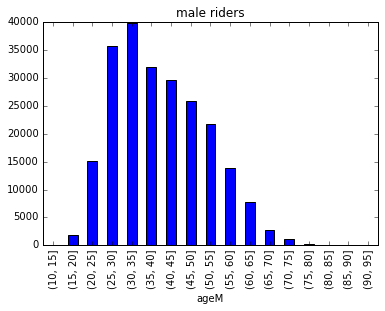

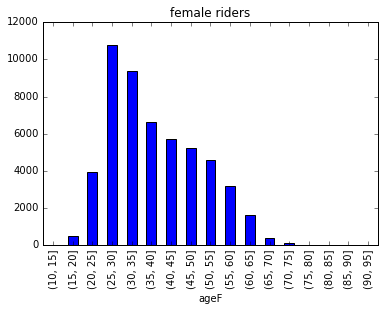

In [8]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

### Figure 1: histogrammed distribution of riders' ages by gender


          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


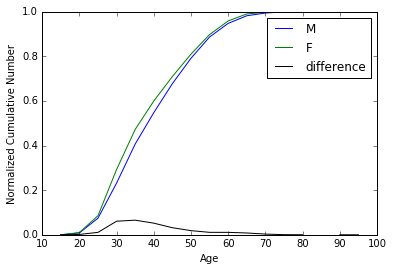

In [9]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

plt.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
plt.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
plt.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
plt.xlabel("Age")
plt.ylabel("Normalized Cumulative Number")
plt.legend()


### Figure 2: the cumulative distribution of CitiBike riders' ages by gender


In [10]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

Ks_2sampResult(statistic=0.067442557802207204, pvalue=4.0408611999082294e-168)


The *scipy.stats.ks_2samp()* calculates the Kolmogorov-Smirnov statistic, taking as an input two samples. It works under the asumption of the null hypothesis being valid, that this two samples are drawn from the same continuous distribution. The p-value property p-value return es below the alpha set at the begining (0.05). Therefore we can, with 95% confidence, reject the null hypothesis, meaning that the two samples do not come from the same distirbution. In other words, the probability of having this results, given the Null Hypothesis is valid, is less than 5%.

## Same test with a subset of the original data 


In [11]:
#and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
dfSubset = df.sample(n=len(df.index)/200)

print df.shape
print dfSubset.shape

(285552, 13)
(1427, 13)


In [12]:
ksSubset = scipy.stats.ks_2samp(dfSubset.ageM, dfSubset.ageF)
print ksSubset

Ks_2sampResult(statistic=0.60616678346180797, pvalue=2.9135003413238131e-230)


The $p-value$ of the test for this subset of the original data is even smaller than the previous one. So we can reject the null hypothesis with even more confidence. In other words, the probability of having this results, given the Null Hypothesis is valid, is smaller than the previous test (both below 5%).

## Pearson's test for correlation

In [35]:
# wrangle the data as needed
pearsonM = df.ageM.sample(n=25000).sort_values()
pearsonF = df.ageF.sample(n=25000).sort_values()

#perform the Pearson's test 

pearsonTest = scipy.stats.pearsonr(pearsonM,pearsonF)
print 'R2: %.2f \np-value %.4f' %(pearsonTest[0],pearsonTest[1])


R2: 0.99 
p-value 0.0000


There is a strong positive correlation (0.99) between ages of the male citibike riders and ages on the female citibike riders. The probability of the test producing this results, given the Null Hypothesis is valid, is smaller than 5%.

## Spearman's test for correlation


In [37]:
# wrangle the data as needed

spearmanM = df.ageM.sample(n=25000).sort_values()
spearmanF = df.ageF.sample(n=25000).sort_values()

# please perform the Spearman's test 
spearmanTest = scipy.stats.spearmanr(spearmanM,spearmanF)

print 'R2: %.2f \np-value %.4f' %(spearmanTest[0],spearmanTest[1])

R2: 1.00 
p-value 0.0000


There is a strong positive correlation (1) between ages of the male citibike riders and ages on the female citibike riders. The probability of the test producing this results, given the Null Hypothesis is valid, is smaller than 5%.